<a href="https://colab.research.google.com/github/bruno353/Data_Science_Projects/blob/main/Projeto_Portf%C3%B3lio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto de Portfólio
####O desafio e os dados desse projeto foram retirados do site: https://sejaumdatascientist.com/como-usar-data-science-para-fazer-a-empresa-vender-mais/
####o dataset: https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction
Nesse projeto, fomos contratados por uma empresa de seguros que deseja implementar um novo seguro de carros no seu negócio. O nosso objetivo 
é, através de um dataset que apresenta um conjunto de clientes que comprariam ou não o seguro, criar um modelo de machine learning que prediz se 
determinado cliente estaria predisposto a se interessar no produto.

 Tentaremos responder 2 perguntas: 

 1-Principais Insights sobre os atributos mais relevantes de clientes interessados em adquirir um seguro de automóvel.
 2-Qual a acurácia do modelo criado para predizer se os clientes comprariam o seguro da empresa ?

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [42]:
df = pd.read_csv('train.csv')

In [43]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [44]:
df.drop(['id'], axis = 1, inplace = True)

In [45]:
for col in df:
	print(f'{col}: {df[col].unique()}')

Gender: ['Male' 'Female']
Age: [44 76 47 21 29 24 23 56 32 41 71 37 25 42 60 65 49 34 51 26 57 79 48 45
 72 30 54 27 38 22 78 20 39 62 58 59 63 50 67 77 28 69 52 31 33 43 36 53
 70 46 55 40 61 75 64 35 66 68 74 73 84 83 81 80 82 85]
Driving_License: [1 0]
Region_Code: [28.  3. 11. 41. 33.  6. 35. 50. 15. 45.  8. 36. 30. 26. 16. 47. 48. 19.
 39. 23. 37.  5. 17.  2.  7. 29. 46. 27. 25. 13. 18. 20. 49. 22. 44.  0.
  9. 31. 12. 34. 21. 10. 14. 38. 24. 40. 43. 32.  4. 51. 42.  1. 52.]
Previously_Insured: [0 1]
Vehicle_Age: ['> 2 Years' '1-2 Year' '< 1 Year']
Vehicle_Damage: ['Yes' 'No']
Annual_Premium: [ 40454.  33536.  38294. ...  20706. 101664.  69845.]
Policy_Sales_Channel: [ 26. 152. 160. 124.  14.  13.  30. 156. 163. 157. 122.  19.  22.  15.
 154.  16.  52. 155.  11. 151. 125.  25.  61.   1.  86.  31. 150.  23.
  60.  21. 121.   3. 139.  12.  29.  55.   7.  47. 127. 153.  78. 158.
  89.  32.   8.  10. 120.  65.   4.  42.  83. 136.  24.  18.  56.  48.
 106.  54.  93. 116.  91.  45.   9.

In [46]:
df.dtypes

Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

Agora vamos limpar os dados: trocar textos por número, retirar Na, Padronizar uma escala e retirar dados incorretos.


In [47]:
#Não tem valores com Na:
df.isnull().sum().sort_values(ascending=False)

Response                0
Vintage                 0
Policy_Sales_Channel    0
Annual_Premium          0
Vehicle_Damage          0
Vehicle_Age             0
Previously_Insured      0
Region_Code             0
Driving_License         0
Age                     0
Gender                  0
dtype: int64

In [48]:
#Trocar o Gender para 1 e 0
df.Gender = df["Gender"].apply(lambda x: 1 if x == 'Female' else 0)

In [49]:
#Trocar o Vehicle_Damage:
df.Vehicle_Damage = df["Vehicle_Damage"].apply(lambda x: 1 if x == 'Yes' else 0)

In [50]:
#Agora vamos usar um Hot Enconding para transformar as colunas com texto de Vehicle_Age em 1 e 0.
df = pd.get_dummies(df, drop_first = True)

In [51]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,0,44,1,28.0,0,1,40454.0,26.0,217,1,0,1
1,0,76,1,3.0,0,0,33536.0,26.0,183,0,0,0
2,0,47,1,28.0,0,1,38294.0,26.0,27,1,0,1
3,0,21,1,11.0,1,0,28619.0,152.0,203,0,1,0
4,1,29,1,41.0,1,0,27496.0,152.0,39,0,1,0


In [52]:
#Vou tirar os Outliers do Annual_Premium, que podem dar algum problema no modelo.
min_thresold, max_thresold = df.Annual_Premium.quantile([0.05, 0.95])
df = df[(df.Annual_Premium<max_thresold) & (df.Annual_Premium>min_thresold)]

In [53]:
#separar entre X e y:

X = df.drop(['Response'], axis = 1)
y = df['Response']

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [55]:
#fazendo padronização escala
from sklearn.preprocessing import StandardScaler
transfer = StandardScaler()
X_train = transfer.fit_transform(X_train)
X_test = transfer.transform(X_test)


Agora vamos analisar os dados e suas correlações através do plot de gráficos

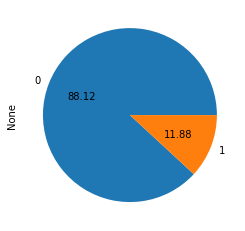

In [56]:
#porcentagem de quantas pessoas responderam não e quantas repsonderam sim.
df.groupby('Response').size().plot(kind='pie', autopct='%.2f')

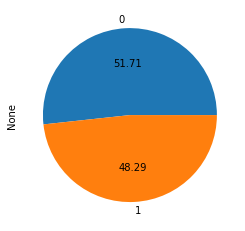

In [112]:
df.groupby('Vehicle_Damage').size().plot(kind='pie', autopct='%.2f')

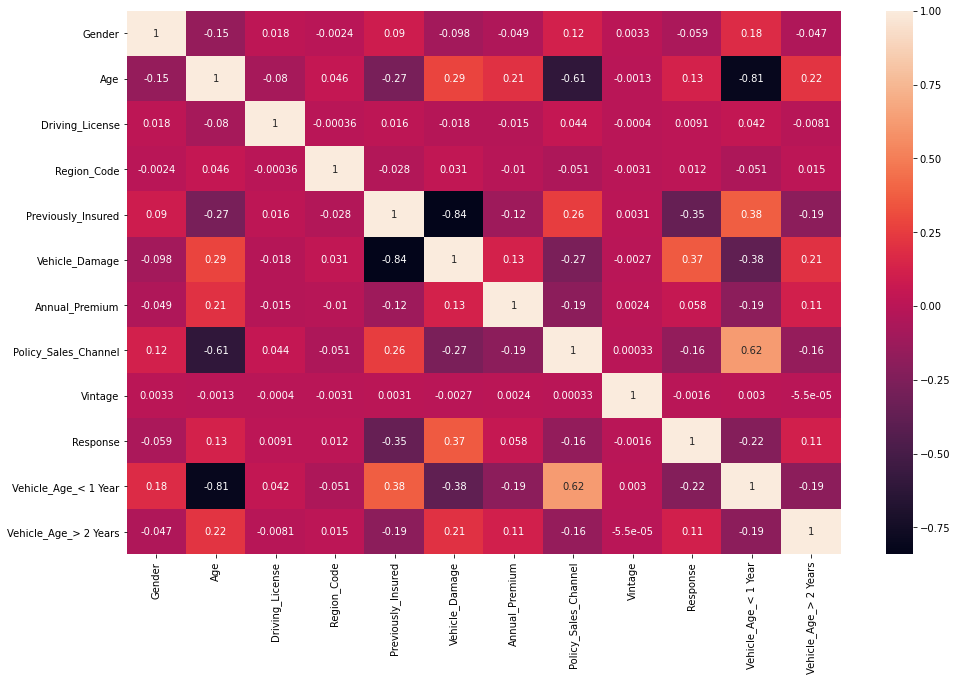

In [57]:
#heatmap de correlação entre variáveis
#percebe-se que a maior correlação positiva com a resposta é a feature 'Vehicle_Damage'
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(method='pearson'), annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9d12cfad90>,
      dtype=object)

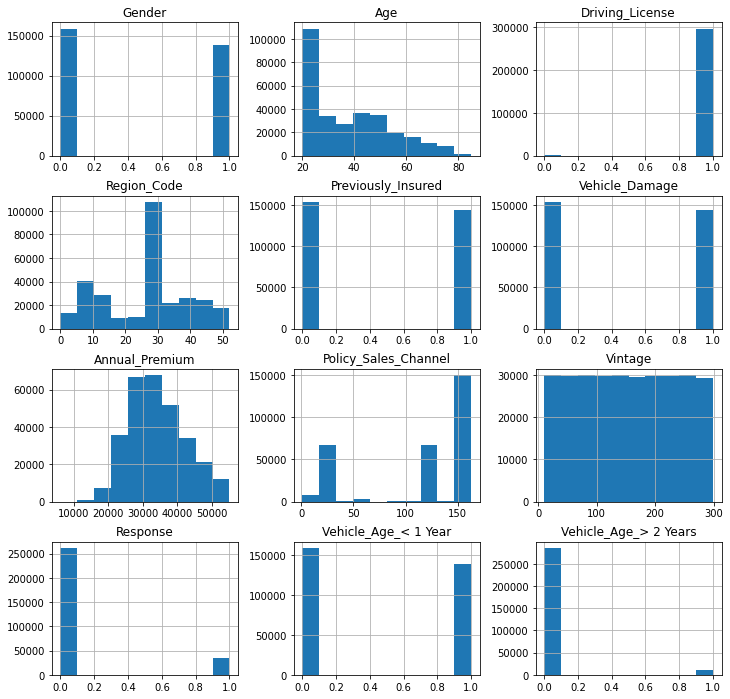

In [58]:
df.hist(figsize = (12,12))

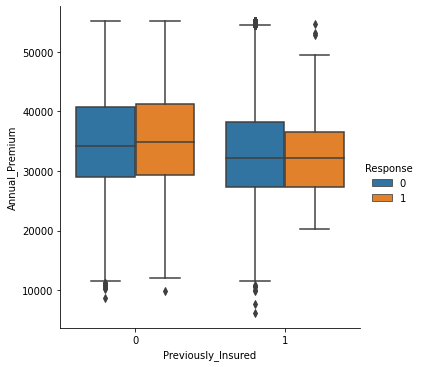

In [59]:
sns.catplot(x='Previously_Insured', y="Annual_Premium",hue = 'Response', kind="box", data=df)

Agora vamos criar o algoritmo e ver qual o melhor modelo para essa issue

In [60]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8816458933426656

In [61]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8719277465205804

In [62]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7281880097989071

In [63]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8815651331197674

#Conclusão:
O modelo de LogisticRegression mostrou-se o mais eficiente: 88% de acurácia, com a feature de 'Vehicle_Damage' sendo a maior correlação entre um cliente comprar ou não o seguro('Response').

A correlação mais negativa (inversamente proporcional) com a 'Response' é a feature 'Previously_insured', ou seja, se o cliente já tem um seguro de automóvel, sua chance de adquirir um novo se torna menor.